In [1]:
#Lab 10: Monte Carlo Simulation of an Ideal Gas
#Lab Partners: Ravi Kini (working alone)
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

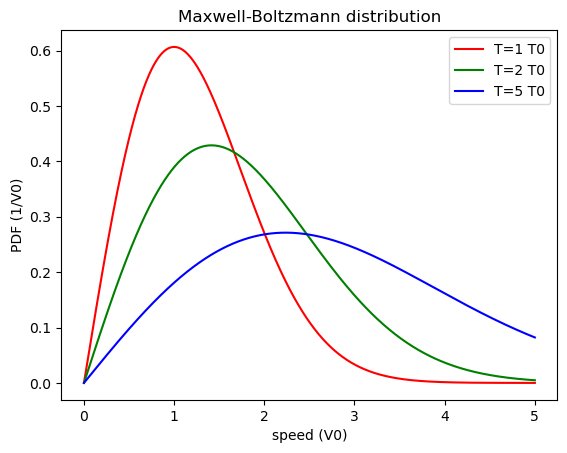

In [2]:
#10.1
# computational system of units:
M = 1 # mass of gas particles, M0 = 4.65E-26 kg
T = 1 # Temperature of gas, T0 = 293 K
kb = 1 # Boltzmanns constant
V = np.sqrt(kb * T / M)
def mbspeed(v):
    return (M*v / (kb*T))*np.exp(-M*v** 2/(2*kb*T))
vf = np.linspace(0,5*V,1000)
pf = mbspeed(vf)
plt.plot(vf, pf, "r-", label="T=1 T0")
T = 2
pf = mbspeed(vf)
plt.plot(vf, pf, "g-", label="T=2 T0")
T = 5
pf = mbspeed(vf)
plt.plot(vf, pf, "b-", label="T=5 T0")
plt.xlabel("speed (V0)")
plt.ylabel("PDF (1/V0)")
plt.title("Maxwell-Boltzmann distribution")
plt.legend()
plt.show()

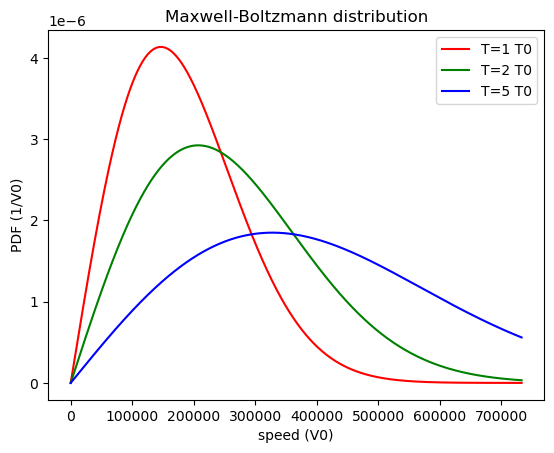

In [3]:
#10.2
#M would be 4.65E-26/E-15 = 4.65E-11
#the scale for the speed and for the PDF changes, 
#but the shape stays the same
#the peak for T=2 T0 is at v=1.414V0, which is the
#same regardless of M0
#choosing a system of units with variables near the
#numerical analysis values is the same as solving
#a problem using only variables, as the exact value
#does not matter
# computational system of units:
M = 4.65*10**-11 # mass of gas particles, M0 = E-15 kg
T = 1 # Temperature of gas, T0 = 293 K
kb = 1 # Boltzmanns constant
V = np.sqrt(kb * T / M)
vf = np.linspace(0,5*V,1000)
pf = mbspeed(vf)
plt.plot(vf, pf, "r-", label="T=1 T0")
T = 2
pf = mbspeed(vf)
plt.plot(vf, pf, "g-", label="T=2 T0")
T = 5
pf = mbspeed(vf)
plt.plot(vf, pf, "b-", label="T=5 T0")
plt.xlabel("speed (V0)")
plt.ylabel("PDF (1/V0)")
plt.title("Maxwell-Boltzmann distribution")
plt.legend()
plt.show()

In [4]:
#10.3
def collide(ax, ay, bx, by, theta):
    ux = (ax - bx) / 2
    uy = (ay - by) / 2
    dax = (np.cos(theta) - 1) * ux - np.sin(theta) * uy
    day = (np.cos(theta) - 1) * uy + np.sin(theta) * ux
    ax = ax + dax
    ay = ay + day
    bx = bx - dax
    by = by - day
    return ax, ay, bx, by
tau = 2*np.pi # Using 2 pi is like saying twice half-way...
# lab frame is cms, incoming on x axis:
print(np.around(collide(1,0,-1,0,0),2)+0)
print(np.around(collide(1,0,-1,0,tau/4),2)+0)
print(np.around(collide(1,0,-1,0,tau/2),2)+0)
print(np.around(collide(1,0,-1,0,3*tau/4),2)+0)
# lab frame is cms, incoming on y axis:
print(np.around(collide(0,1,0,-1,0),2)+0)
print(np.around(collide(0,1,0,-1,tau/4),2)+0)
print(np.around(collide(0,1,0,-1,tau/2),2)+0)
print(np.around(collide(0,1,0,-1,3*tau/4),2)+0)

[ 1.  0. -1.  0.]
[ 0.  1.  0. -1.]
[-1.  0.  1.  0.]
[ 0. -1.  0.  1.]
[ 0.  1.  0. -1.]
[-1.  0.  1.  0.]
[ 0. -1.  0.  1.]
[ 1.  0. -1.  0.]


In [5]:
#10.4
# boost along x axis, incoming on y axis:
print(np.around(collide(1,1,1,-1,0),2)+0)
print(np.around(collide(1,1,1,-1,tau/4),2)+0)
print(np.around(collide(1,1,1,-1,tau/2),2)+0)
print(np.around(collide(1,1,1,-1,3*tau/4),2)+0)

[ 1.  1.  1. -1.]
[0. 0. 2. 0.]
[ 1. -1.  1.  1.]
[2. 0. 0. 0.]


In [6]:
#10.5
# test with random values:
print(np.around(collide(6.24, 1.78, 3.35, 5.98, 3.19),2))
print(np.around(collide(4.07, 4.69, 1.61, 4.54, 2.46),2))
print(np.around(collide(5.28, 2.99, 4.77, 5.22, 3.15),2))
print(np.around(collide(2.84, 5.37, 5.47, 6.16, 1.59),2))

[3.25 5.91 6.34 1.85]
[1.84 5.33 3.84 3.9 ]
[4.76 5.22 5.29 2.99]
[4.58 4.46 3.73 7.07]


In [7]:
#10.6
NGAS = 5
vx = np.random.uniform(-2, 2, NGAS)
vy = np.random.uniform(-2, 2, NGAS)
print(vx)
print(vy)

[-0.49350367  0.45412148  1.0106962  -1.96863647  1.08737432]
[-0.19266272 -0.43268912  1.82164862  1.97815913 -1.30137888]


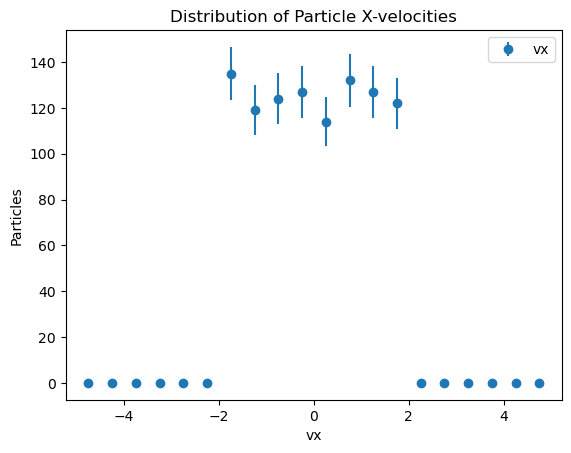

In [8]:
#10.7
NGAS=1000
vx = np.random.uniform(-2, 2, NGAS)
vy = np.random.uniform(-2, 2, NGAS)
hvx ,bins = np.histogram(vx ,bins=20 ,range=(-5,5))
cbins = (bins[1:]+bins[:-1])/2
plt.errorbar(cbins ,hvx ,yerr=np.sqrt(hvx),fmt="o" ,label="vx")
plt.xlabel("vx")
plt.ylabel("Particles")
plt.title("Distribution of Particle X-velocities")
plt.legend()
plt.show()

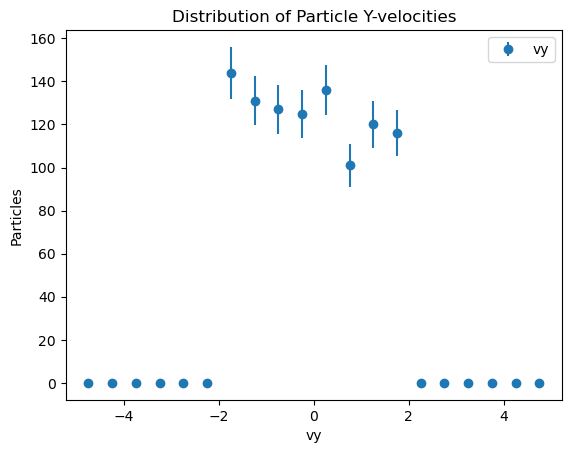

In [9]:
#10.8
hvy ,bins = np.histogram(vy ,bins=20 ,range=(-5,5))
cbins = (bins[1:]+bins[:-1])/2
plt.errorbar(cbins ,hvy ,yerr=np.sqrt(hvy),fmt="o" ,label="vy")
plt.xlabel("vy")
plt.ylabel("Particles")
plt.title("Distribution of Particle Y-velocities")
plt.legend()
plt.show()

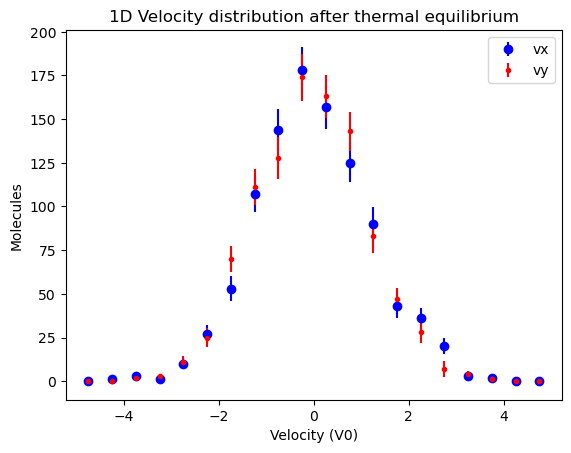

In [10]:
#10.9
NCOLL = 10000
for i in range(NCOLL):
    a, b = np.random.choice(NGAS, 2)
    #print(a, b)
    theta = np.random.uniform(0, 2*np.pi)
    ax, ay, bx, by = collide(vx[a], vy[a], vx[b], vy[b], theta)
    vx[a] = ax
    vy[a] = ay
    vx[b] = bx
    vy[b] = by
    #print(ax, ay, bx, by)
hvx ,bins = np.histogram(vx ,bins=20 ,range=(-5,5))
hvy ,bins = np.histogram(vy ,bins=20 ,range=(-5,5))
cbins = (bins[1:]+bins[:-1])/2
plt.errorbar(cbins ,hvx ,yerr=np.sqrt(hvx),fmt="bo",label="vx")
plt.errorbar(cbins ,hvy ,yerr=np.sqrt(hvx),fmt="r.",label="vy")
plt.xlabel("Velocity (V0)")
plt.ylabel("Molecules")
plt.title("1D Velocity distribution after thermal equilibrium")
plt.legend()
plt.show()

In [11]:
#10.10
M = 1
T = 1
NGAS=10000
V = np.sqrt(kb * T / M)
vx = np.random.uniform(-2, 2, NGAS)
vy = np.random.uniform(-2, 2, NGAS)
kT = M * (np.mean(vx ** 2) + np.mean(vy ** 2))/2
print("kT is approximately", kT, "before the collisions")
NCOLL = 100000
for i in range(NCOLL):
    a, b = np.random.choice(NGAS, 2)
    #print(a, b)
    theta = np.random.uniform(0, 2*np.pi)
    ax, ay, bx, by = collide(vx[a], vy[a], vx[b], vy[b], theta)
    vx[a] = ax
    vy[a] = ay
    vx[b] = bx
    vy[b] = by
    #print(ax, ay, bx, by)
kT = M * (np.mean(vx ** 2) + np.mean(vy ** 2))/2
print("kT is approximately", kT, "after the collisions")

kT is approximately 1.3403558420812192 before the collisions
kT is approximately 1.3403558420812192 after the collisions


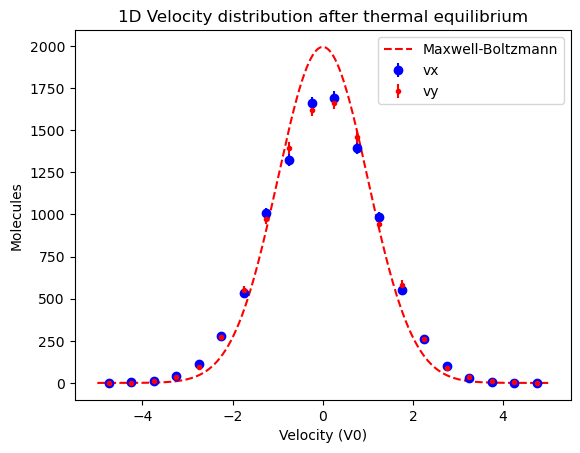

In [12]:
#10.11
def mbspeed(v):
    return (M*v / (kb*T))*np.exp(-M*v** 2/(2*kb*T))
def mbspeed1d(v):
    return np.sqrt(M/(2*np.pi*kb*T))*np.exp(-M*v**2/(2*kb*T))
hvx ,xbins = np.histogram(vx ,bins=20 ,range=(-5,5))
hvy ,ybins = np.histogram(vy ,bins=20 ,range=(-5,5))
xcbins = (xbins[1:]+xbins[:-1])/2
ycbins = (ybins[1:]+ybins[:-1])/2
plt.errorbar(xcbins ,hvx ,yerr=np.sqrt(hvx),fmt="bo",label="vx")
plt.errorbar(ycbins ,hvy ,yerr=np.sqrt(hvy),fmt="r.",label="vy")
plt.xlabel("Velocity (V0)")
plt.ylabel("Molecules")
vf = np.linspace(-5*V,5*V,1000)
pf = mbspeed1d(vf)*NGAS*10/20
plt.plot(vf, pf, "r--", label="Maxwell-Boltzmann")
plt.title("1D Velocity distribution after thermal equilibrium")
plt.legend()
plt.show()

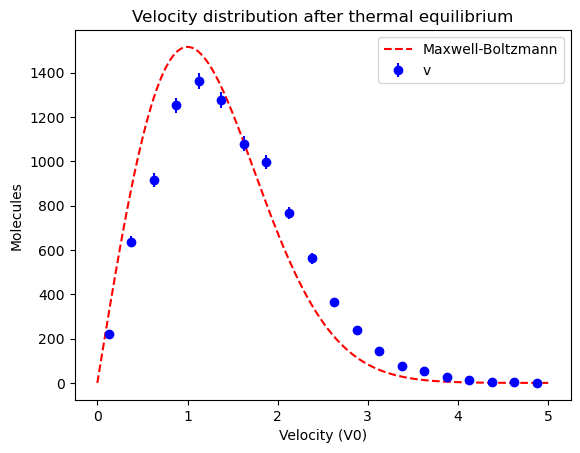

In [13]:
#10.12
vv = np.sqrt(vx ** 2 + vy ** 2)
hv ,bins = np.histogram(vv ,bins=20 ,range=(0,5))
cbins = (bins[1:]+bins[:-1])/2
plt.errorbar(cbins ,hv ,yerr=np.sqrt(hv),fmt="bo",label="v")
plt.xlabel("Velocity (V0)")
plt.ylabel("Molecules")
vf = np.linspace(0,5*V,1000)
pf = mbspeed(vf)*NGAS*5/20
plt.plot(vf, pf, "r--", label="Maxwell-Boltzmann")
plt.title("Velocity distribution after thermal equilibrium")
plt.legend()
plt.show()

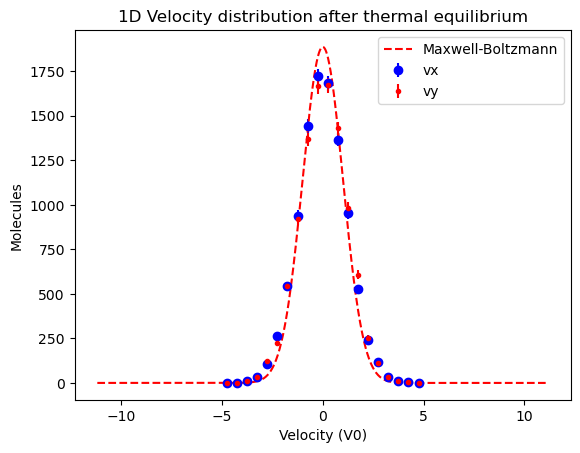

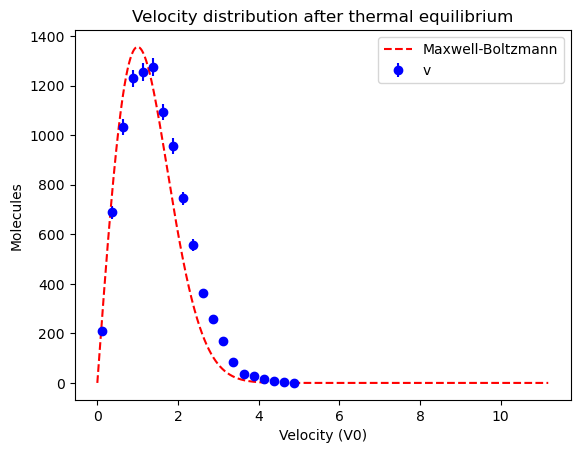

In [14]:
#10.13
def maxwell(T):
    M = 1
    kb = 1
    NGAS=10000
    V = np.sqrt(kb * T / M)
    vx = np.random.uniform(-2, 2, NGAS)
    vy = np.random.uniform(-2, 2, NGAS)
    
    NCOLL = 100000
    for i in range(NCOLL):
        a, b = np.random.choice(NGAS, 2, replace=False)
        #print(a, b)
        theta = np.random.uniform(0, 2*np.pi)
        ax, ay, bx, by = collide(vx[a], vy[a], vx[b], vy[b], theta)
        vx[a] = ax
        vy[a] = ay
        vx[b] = bx
        vy[b] = by
    
    hvx ,xbins = np.histogram(vx ,bins=20 ,range=(-5,5))
    hvy ,ybins = np.histogram(vy ,bins=20 ,range=(-5,5))
    xcbins = (xbins[1:]+xbins[:-1])/2
    ycbins = (ybins[1:]+ybins[:-1])/2
    plt.errorbar(xcbins ,hvx ,yerr=np.sqrt(hvx),fmt="bo",label="vx")
    plt.errorbar(ycbins ,hvy ,yerr=np.sqrt(hvy),fmt="r.",label="vy")
    plt.xlabel("Velocity (V0)")
    plt.ylabel("Molecules")
    vf = np.linspace(-5*V,5*V,1000)
    pf = mbspeed1d(vf)*NGAS/(20 **0.25)
    plt.plot(vf, pf, "r--", label="Maxwell-Boltzmann")
    plt.title("1D Velocity distribution after thermal equilibrium")
    plt.legend()
    plt.show()
    
    vv = np.sqrt(vx ** 2 + vy ** 2)
    hv ,bins = np.histogram(vv ,bins=20 ,range=(0,5))
    cbins = (bins[1:]+bins[:-1])/2
    plt.errorbar(cbins ,hv ,yerr=np.sqrt(hv),fmt="bo",label="v")
    plt.xlabel("Velocity (V0)")
    plt.ylabel("Molecules")
    vf = np.linspace(0,5*V,1000)
    pf = mbspeed(vf)*NGAS/(20 **0.5)
    plt.plot(vf, pf, "r--", label="Maxwell-Boltzmann")
    plt.title("Velocity distribution after thermal equilibrium")
    plt.legend()
    plt.show()

maxwell(5)

In [15]:
#10.14
N = 1000
L = 1
tt = 0.01 * L/V
xx = np.random.uniform(0, L, NGAS)
dp = 0
for i in range(N):
    xx = xx + tt * vx 
    #update particle positions
    mask = np.abs(xx - L/2) > L/2
    #boolean mask for outside boundaries
    dp = dp + 2 * M * np.sum(np.abs(np.multiply((mask.astype(int)), vx)))
    #update total momentum transferred
    xx = np.multiply((mask.astype(int)), ((2 * L - xx) % L) - xx) + xx
    #update particle positions for wall collision
    vx = -2 * np.multiply((mask.astype(int) - 0.5), vx)
    #update particle velocities for wall collision
print("The simulated force is", dp / (2 * N * tt))
print("The expected force is", NGAS * kb * T / L)

The simulated force is 13504.33808799157
The expected force is 10000.0


In [16]:
#10.15
N = 1000
L = 1
tt = 0.01 * L/V
xx = np.random.uniform(0, L, NGAS)
vx = np.random.uniform(-2, 2, NGAS)
dp = 0
for i in range(N):
    xx = xx + tt * vx
    #update particle positions
    mask = np.abs(xx - L/2) > L/2
    #boolean mask for outside boundaries
    dp = dp + 2 * M * np.sum(np.abs(np.multiply((mask.astype(int)), vx)))
    #update total momentum transferred
    xx = np.multiply((mask.astype(int)), ((2 * L - xx) % L) - xx) + xx
    #update particle positions for wall collision
    vx = -2 * np.multiply((mask.astype(int) - 0.5), vx)
    #update particle velocities for wall collision
print("The simulated force is", dp / (2 * N * tt))
print("The expected force is", NGAS * kb * T / L)
#the ideal gas law holds true even when not in thermal equilibrium

The simulated force is 13274.57139000967
The expected force is 10000.0


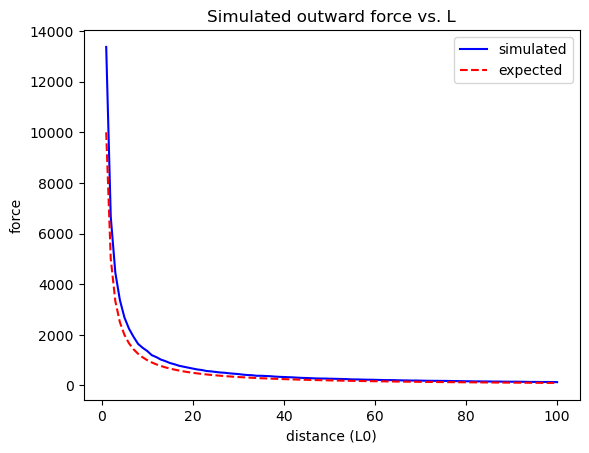

In [17]:
#10.16
def idealgasL(L):
    M = 1
    kb = 1
    T = 1
    NGAS=10000
    V = np.sqrt(kb * T / M)
    N = 1000
    tt = 0.01 * L/V
    xx = np.random.uniform(0, L, NGAS)
    vx = np.random.uniform(-2, 2, NGAS)
    dp = 0
    for i in range(N):
        xx = xx + tt * vx
        #update particle positions
        mask = np.abs(xx - L/2) > L/2
        #boolean mask for outside boundaries
        dp = dp + 2 * M * np.sum(np.abs(np.multiply((mask.astype(int)), vx)))
        #update total momentum transferred
        xx = np.multiply((mask.astype(int)), ((2 * L - xx) % L) - xx) + xx
        #update particle positions for wall collision
        vx = -2 * np.multiply((mask.astype(int) - 0.5), vx)
        #update particle velocities for wall collision
    return dp / (2 * N * tt)
ll = np.linspace(1, 100, 100)
plt.plot(ll, np.array([idealgasL(L) for L in ll]), "b-", label="simulated")
plt.plot(ll, 10000 * 1 * 1 / ll, "r--", label="expected")
plt.xlabel("distance (L0)")
plt.ylabel("force")
plt.title("Simulated outward force vs. L")
plt.legend()
plt.show()

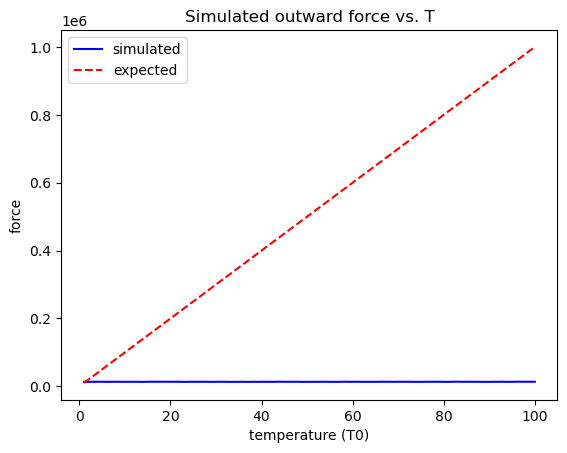

In [18]:
#10.17
def idealgasT(T):
    M = 1
    kb = 1
    L = 1
    NGAS=10000
    V = np.sqrt(kb * T / M)
    N = 1000
    tt = 0.01 * L/V
    xx = np.random.uniform(0, L, NGAS)
    vx = np.random.uniform(-2, 2, NGAS)
    dp = 0
    for i in range(N):
        xx = xx + tt * vx
        #update particle positions
        mask = np.abs(xx - L/2) > L/2
        #boolean mask for outside boundaries
        dp = dp + 2 * M * np.sum(np.abs(np.multiply((mask.astype(int)), vx)))
        #update total momentum transferred
        xx = np.multiply((mask.astype(int)), ((2 * L - xx) % L) - xx) + xx
        #update particle positions for wall collision
        vx = -2 * np.multiply((mask.astype(int) - 0.5), vx)
        #update particle velocities for wall collision
    return dp / (2 * N * tt)
tt = np.linspace(1, 100, 100)
plt.plot(tt, np.array([idealgasT(T) for T in tt]), "b-", label="simulated")
plt.plot(tt, 10000 * 1 * tt / 1, "r--", label="expected")
plt.xlabel("temperature (T0)")
plt.ylabel("force")
plt.title("Simulated outward force vs. T")
plt.legend()
plt.show()
#ideal gas law doesn't work at high temperatures